In [38]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
sys.path.append('../../utils')

from tomography import coherent_state_tomography as cst
from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from math_utils import statistics_utils as su

In [37]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# I am uncertain about whether or not using a small square is actually a bad idea, so I'm going to try
# mle with a well-represented small square of halfwidth 2

max_x = 4
mesh_size = 0.5
dim = 40 # I'm actually skeptical that this is even high enough really
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
target_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
target_state = target_state * target_state.dag()

# Make the noisy POVM
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)
noiseless_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim)

# We'll make the data with high dimensional states to ensure it's 'close to real'
high_dim = 200
clean_target_state = (qutip.basis(high_dim, 0) + qutip.basis(high_dim, 1)).unit()
clean_target_state = clean_target_state * clean_target_state.dag()
clean_ideal_target_Q_function = qutip.qfunc(clean_target_state, xs, ps, g=2)
clean_noisy_target_Q_function = cst.evaluate_thermally_noisy_Q_function(clean_target_state, 
                                                                  number_of_noise_photons, 
                                                                  xs, 
                                                                  ps)

# Also make low dimensional data for testing
ideal_target_Q_function = qutip.qfunc(target_state, xs, ps, g=2)
noisy_target_Q_function = cst.evaluate_thermally_noisy_Q_function(target_state, 
                                                                  number_of_noise_photons, 
                                                                  xs, 
                                                                  ps)


# And now we'll try to reconstruct the input state
number_of_mle_iterations = 15000
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noisy_target_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=target_state)
e = time.time()
print('Time for MLE reconstruction for max_x = ' + str(max_x) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for max_x = 4: 2155.7558419704437 s


<IPython.core.display.Javascript object>


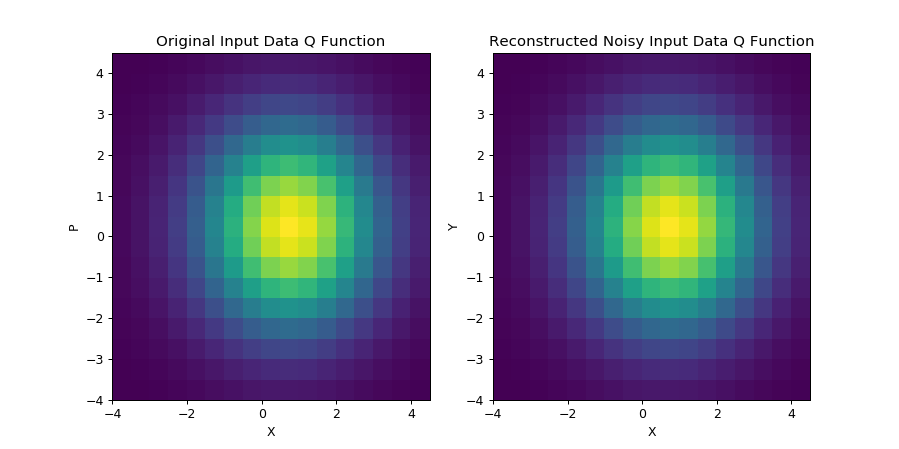

<IPython.core.display.Javascript object>


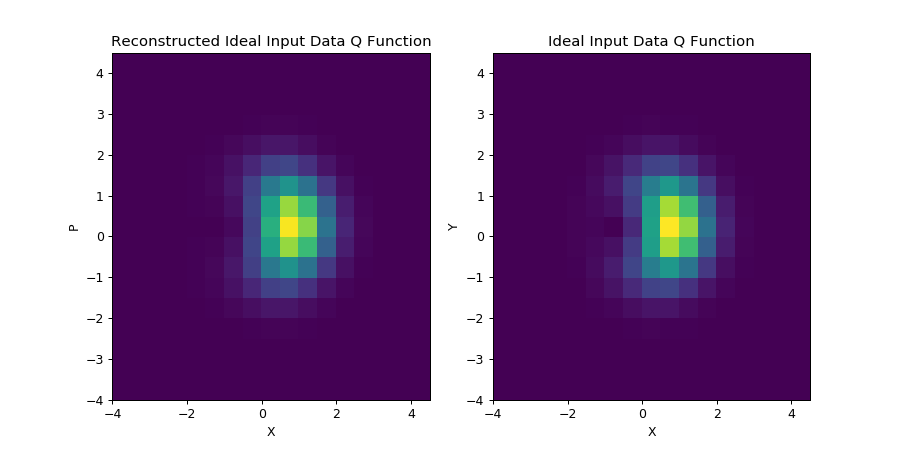

<IPython.core.display.Javascript object>


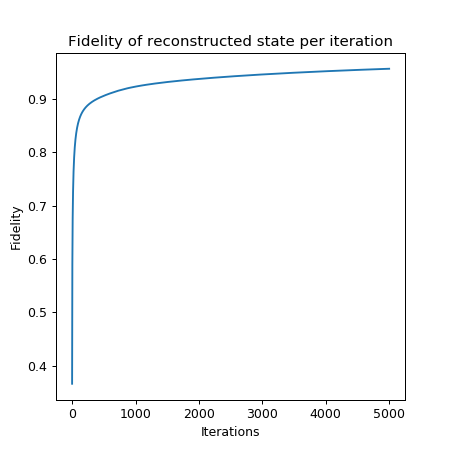

In [7]:
cst.plot_coherent_state_tomography_Q_functions(noisy_target_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=target_state,
                                               fidelities=fidelities)

<IPython.core.display.Javascript object>


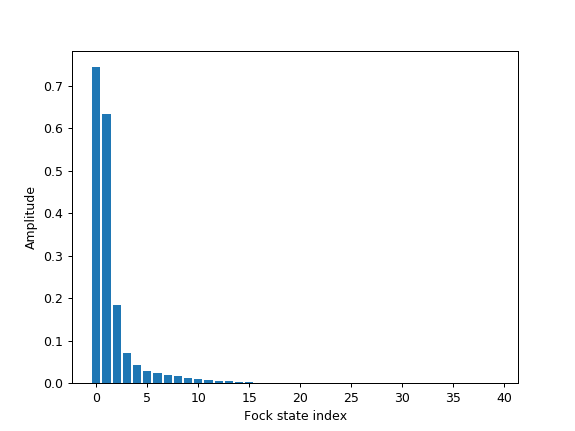

In [8]:
state_vis.plot_fock_basis_amplitudes(reconstructed_state)

In [12]:
max_x = 4
mesh_size = 0.25
dim = 150 # I'm actually skeptical that this is even high enough really
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
target_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
target_state = target_state * target_state.dag()

# Make the noisy POVM
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

G = cst.sum_povm_elements(noisy_povm)
G_inv = cst.extract_G_inv_from_POVM(noisy_povm)
g = np.matrix(G)
g_inv = np.matrix(G_inv)
g_inv = np.linalg.inv(g)
np.allclose(np.dot(g, g_inv), np.identity(g.shape[0]))

True

In [13]:
state_vis.plot_fock_basis_amplitudes(input_state)

NameError: name 'input_state' is not defined

In [209]:
cst.sum_povm_elements(noisy_povm)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Quantum object: dims = [[40], [40]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[ 3.99999915e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  3.99999298e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ... -3.07295974e-11+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   3.99996748e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   3.44668049e-12+0.00000000e+00j -1.04895823e-12+1.04895861e-12j]
 ...
 [ 0.00000000e+00+0.00000000e+00j -3.07295974e-11+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  4.18621094e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   3.44668049e-12+0.000

In [92]:
max_x = 5
mesh_size = 0.5
number_of_noise_photons = 1

# Define the range of dimensions
smallest_dim = 30
largest_dim = 120
stepsize = 10
dims = np.arange(smallest_dim, largest_dim + stepsize, stepsize)
dim = 200
dims = [dim]

noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

s = time.time()
noisy_povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state,
                                                              cutoff=1e-8)
e = time.time()
print('Constructing POVM took: ' + str(e - s) + str(' seconds'))

Constructing POVM took: 32.1003053188324 seconds


In [99]:
# Sweep the dims and extract the results for each case
reconstructed_states = []
noisy_data_Q_functions = []
fidelities_per_dim = []
final_fidelities_per_dim = []
xs_per_dim = []
ps_per_dim = []

for dim in dims:
    # Define the noise
#    noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
    
    # THIS TAKES TOO LONG TO RUN OVER AND OVER AGAIN
    # Construct the noisy POVM that we'll use for tomography
#     noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
#                                                                   mesh_size, 
#                                                                   dim, 
#                                                                   noise_base=noise_state)
    xs_per_dim.append(xs)
    ps_per_dim.append(ps)

    # Define the input state and use the noise state to generate its noisy Q function
    #
    # The Q function of a state is its ideal input for coherent state POVM as it is literally
    # defined to be Q(alpha; rho) = 1/pi * (<alpha|rho|alpha>) = Tr(rho * POVM_alpha)
    input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
    input_state = input_state * input_state.dag()
    noise_Q_function = qutip.qfunc(noise_state, xs, ps, g=2)
    noisy_data_Q_function = \
        cst2.evaluate_thermally_noisy_Q_function(input_state, 
                                                number_of_noise_photons, 
                                                xs, 
                                                ps)
    noisy_data_Q_functions.append(noisy_data_Q_function)
    
    # Perform MLE
    # Make 8000 with identity mixin = 0.95
    number_of_mle_iterations = 1000
    s = time.time()
    reconstructed_state, fidelities, bad_states, traces, R_mins, R_maxes, lls = cst2.perform_coherent_state_MLE(
                                        noisy_povm,
                                        noisy_data_Q_function, 
                                        number_of_mle_iterations,
                                        rho_ideal=input_state,
                                        identity_mixin=0,
                                        frequency_threshold=0,
                                        data_threshold=0,
                                        cutoff=1e-10) # 1e-16 made things work
    e = time.time()
    print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')
    
    reconstructed_states.append(reconstructed_state)
    fidelities_per_dim.append(fidelities)
    final_fidelities_per_dim.append(fidelities[-1])

Time for MLE reconstruction for dim = 200: 604.3133361339569 s


0.11545657125996722


<IPython.core.display.Javascript object>


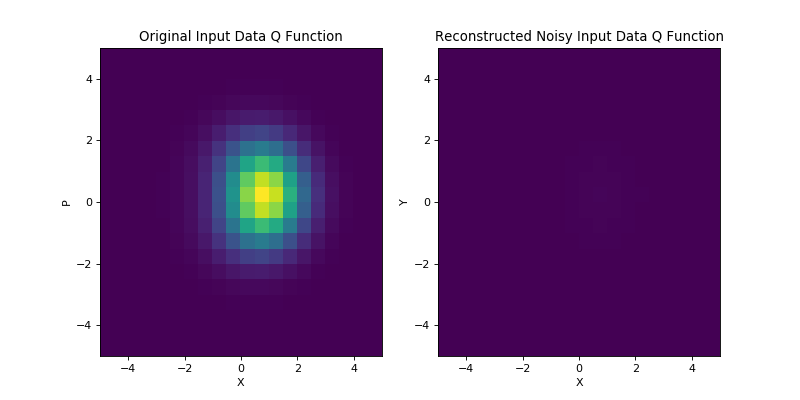

<IPython.core.display.Javascript object>


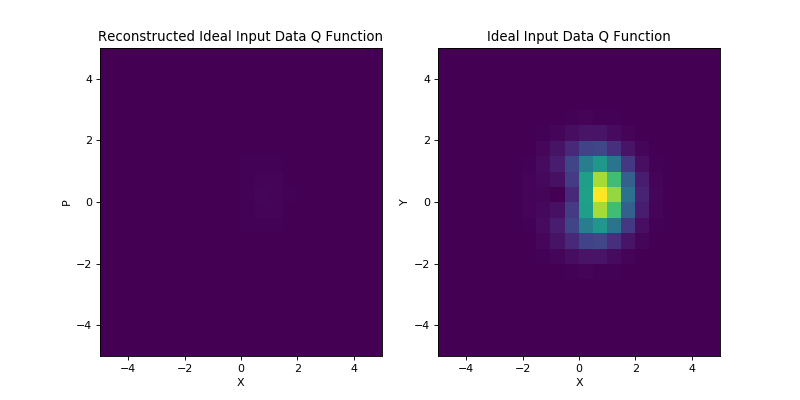

<IPython.core.display.Javascript object>


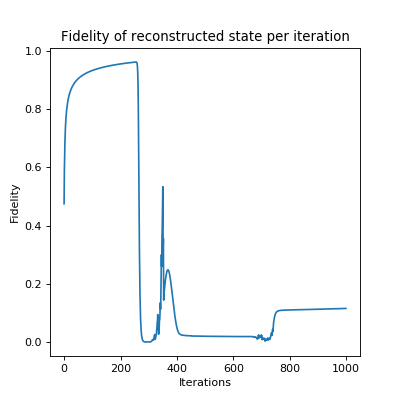

<IPython.core.display.Javascript object>


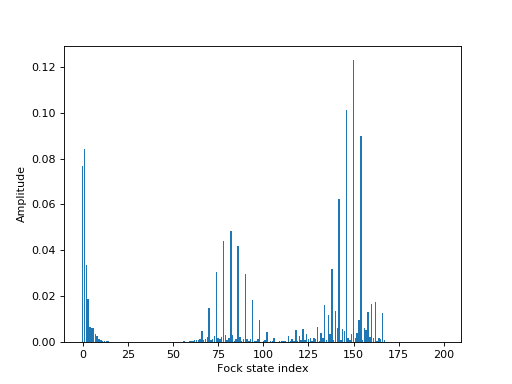

<IPython.core.display.Javascript object>


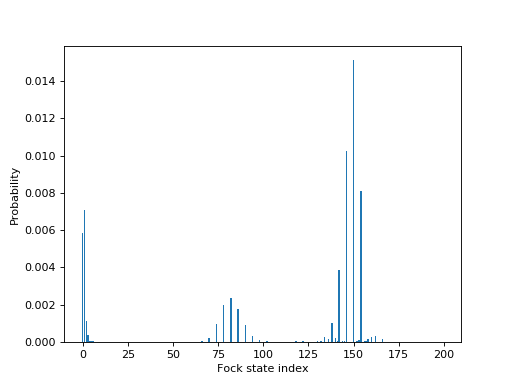

In [100]:
i = 0
rs = reconstructed_states[i]
ndQf = noisy_data_Q_functions[i]
fs = fidelities_per_dim[i]
xs = xs_per_dim[i]
ps = ps_per_dim[i]

print(fs[-1])

cst2.plot_coherent_state_tomography_Q_functions(ndQf,
                                               rs,
                                               xs,
                                               ps,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=input_state,
                                               fidelities=fs)

state_vis.plot_fock_basis_probabilities(rs)

<IPython.core.display.Javascript object>


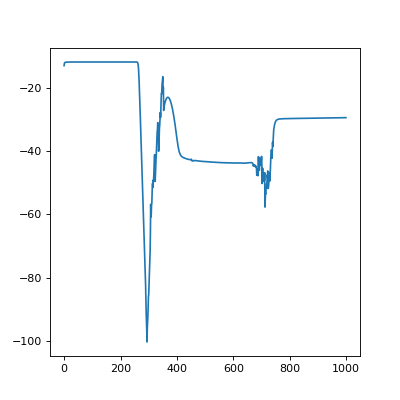

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(len(lls)), lls)

<IPython.core.display.Javascript object>


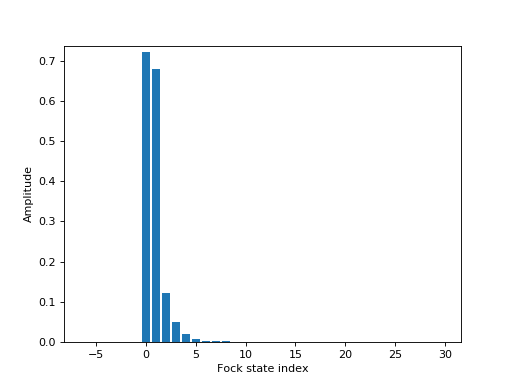

In [12]:
state_vis.plot_fock_basis_amplitudes(rs)

In [89]:
max_x = 5
mesh_size = 0.5
dim = 35

superposition_input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
superposition_input_state = superposition_input_state * superposition_input_state.dag()

# Construct a noiseless POVM to use
s = time.time()
noiseless_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                                  mesh_size, 
                                                                  dim)
e = time.time()
print('Constructing POVM took: ' + str(e - s) + ' s')

# Generate the noiseless data
ideal_superposition_qfunc = qutip.qfunc(superposition_input_state, xs, ps, g=2)
number_of_samples = int(1e6)
ideal_sampled_data = su.sample_2d_distribution(ideal_superposition_qfunc, number_of_samples) / mesh_size**2

# Perform ideal coherent state POVM MLE
number_of_mle_iterations = 300
s = time.time()
reconstructed_superposition_state, superposition_fidelities, _, _, _, _, lls = \
    cst.perform_coherent_state_MLE(
        noiseless_povm,
        ideal_sampled_data, 
        number_of_mle_iterations,
        rho_ideal=superposition_input_state)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Constructing POVM took: 1.6334381103515625 s
[179 201 286 ... 220 219 242]
Time for MLE reconstruction for dim = 35: 50.754374980926514 s


<IPython.core.display.Javascript object>


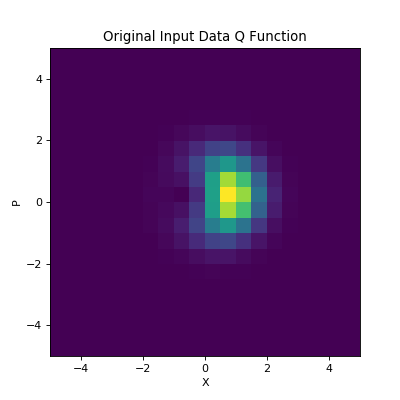

<IPython.core.display.Javascript object>


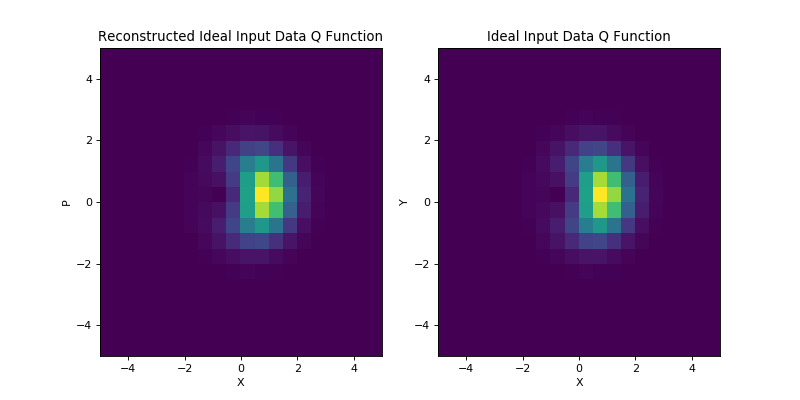

<IPython.core.display.Javascript object>


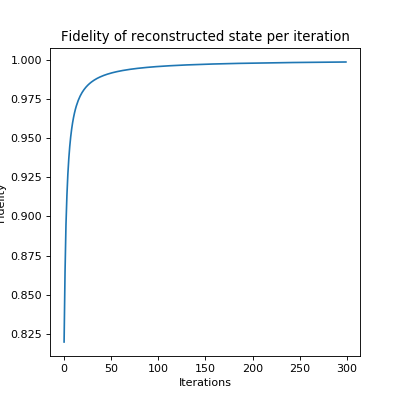

<IPython.core.display.Javascript object>


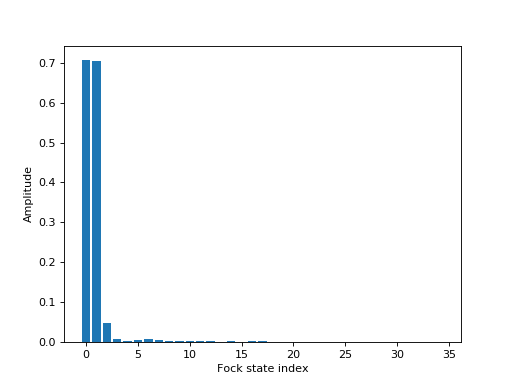

<IPython.core.display.Javascript object>


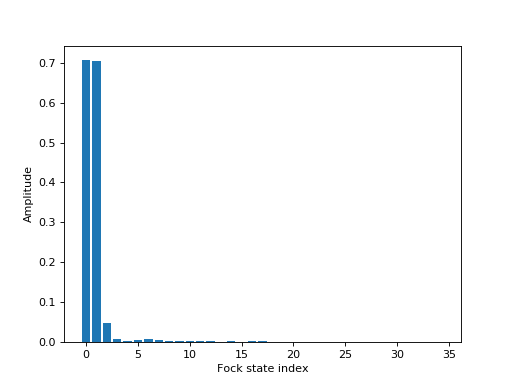

In [90]:
cst.plot_coherent_state_tomography_Q_functions(ideal_sampled_data,
                                               reconstructed_superposition_state,
                                               xs,
                                               ps,
                                               ideal_state=superposition_input_state,
                                               fidelities=superposition_fidelities)
state_vis.plot_fock_basis_amplitudes(reconstructed_superposition_state)

In [54]:
# Check to see how different Q functions are for different dimensional states
max_x = 5
mesh_size = 0.25
dim = 1

# Construct a noiseless POVM to use
s = time.time()
_, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                     mesh_size, 
                                                     dim)
e = time.time()
print('Constructing POVM took: ' + str(e - s) + ' s')

Constructing POVM took: 3.0558550357818604 s


In [55]:
dim350_input_state = (qutip.basis(350, 0) + qutip.basis(350, 1)).unit()
dim20_input_state = (qutip.basis(20, 0) + qutip.basis(20, 1)).unit()
dim350_Q_func = qutip.qfunc(dim350_input_state, xs, ps, g=2)
dim20_Q_func = qutip.qfunc(dim20_input_state, xs, ps, g=2)
diff_Q_func = dim350_Q_func - dim20_Q_func

In [56]:
print(np.max(diff_Q_func))

0.0


In [57]:
print(np.min(diff_Q_func))

0.0


In [81]:
h = su.sample_2d_distribution(dim20_Q_func, 100000)
print(h)

[843 882 926 ... 676 799 721]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
print(h.shape)

(41, 41)


<IPython.core.display.Javascript object>


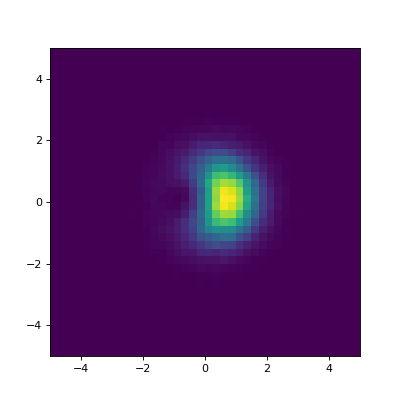

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pcolormesh(xs, ps, h)